In [1]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
path = 'Mt_Everest_Ascent_Data.csv'
df = pd.read_csv(path)
df.head()

,Peak,Name,Yr/Seas,Date,Time,Citizenship,Sex,Age,Oxy,Dth,Host
0,EVER,Tenzing Norgay,1953 Spr,29-May,11:30,India,M,39,Y,.,Nepal
1,EVER,Edmund Percival Hillary,1953 Spr,29-May,11:30,New Zealand,M,33,Y,.,Nepal
2,EVER,Juerg P. Marmet,1956 Spr,23-May,14:00,Switzerland,M,28,Y,.,Nepal
3,EVER,Ernst Schmied,1956 Spr,23-May,14:00,Switzerland,M,31,Y,.,Nepal
4,EVER,Adolf (Dolf) Reist,1956 Spr,24-May,11:00,Switzerland,M,35,Y,.,Nepal


In [3]:
print('-----------------Data info--------------------')
df.info()
print('-----------------Data statistical (numerical features) measures--------------------')
print(df.describe())

-----------------Data info--------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10184 entries, 0 to 10183
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Peak          10184 non-null  object
 1   Name          10184 non-null  object
 2   Yr/Seas       10184 non-null  object
 3   Date          10184 non-null  object
 4   Time          8541 non-null   object
 5   Citizenship   10184 non-null  object
 6   Sex           10184 non-null  object
 7   Age           10184 non-null  int64 
 8   Oxy           10184 non-null  object
 9   Dth           10184 non-null  object
 10  Host          10184 non-null  object
dtypes: int64(1), object(10)
memory usage: 875.3+ KB
-----------------Data statistical (numerical features) measures--------------------
               Age 
count  10184.000000
mean      34.690888
std       10.304911
min        0.000000
25%       28.000000
50%       34.000000
75%       41.000000
m

90% Of features are object type, Detailed analysis will be necessary to better understand the distinctive patterns

In [4]:
# Strip trailing spaces from column names
print(df.columns)
df.columns = df.columns.str.strip()

# Delete peak column
df = df.drop(columns=['Peak'],axis=1)

Index(['Peak ', 'Name ', 'Yr/Seas ', 'Date ', 'Time ', 'Citizenship ', 'Sex ',
       'Age ', 'Oxy ', 'Dth ', 'Host '],
      dtype='object')


#### Breaking down Features

In [5]:
#'Yr/Seas' to Year, Season
df[["Year", "Season"]] = ( 
    df["Yr/Seas"]          
    .str                         
    .split(" ", expand=True)   # splitting on " "  
)
df = df.drop(columns=['Yr/Seas'],axis=1)
#Season rename
#print(df['Season'].unique()) --> ['Spr' 'Aut' 'Win' 'Sum']
df['Season'] = df['Season'].replace({
    'Spr': 'Spring',
    'Aut': 'Autumn',
    'Win': 'Winter',
    'Sum': 'Summer'
})

#Date format 'day-Month' --> no need exactly day
df['Month'] = df['Date'].str.split('-').str[1]
df = df.drop(columns=['Date'],axis=1)

# Due each person has a different climbing rate, 'Time' has not importance.
df = df.drop(columns=['Time'],axis=1)

In [6]:
# Dth- Did the ascent result in death?
# Possibles values: '.', 'Y' --> Asume Y = Yes, Let's do True or False
df['Dth'] = df['Dth'].replace({
    '.': 'F',
    'Y': 'T'
})

### Dataset after Transformations

In [7]:
df.tail()

,Name,Citizenship,Sex,Age,Oxy,Dth,Host,Year,Season,Month
10179,Xiao-Lin Li,China,M,35,Y,F,China,2020,Spring,May
10180,Xin-Guo Li,China,M,0,Y,F,China,2020,Spring,May
10181,Ping Liu,China,F,39,Y,F,China,2020,Spring,May
10182,Ying Ma,China,F,42,Y,F,China,2020,Spring,May
10183,Zhi-Gang Ru,China,M,35,Y,F,China,2020,Spring,May


#### Let's discover patterns

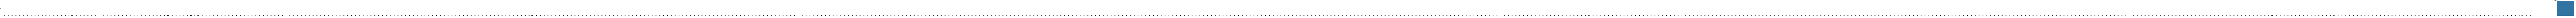

In [8]:
death_counts = df.groupby('Sex')['Dth'].sum().reset_index()
plt.figure(figsize=(16,6))
# Create a bar plot for the total deaths by sex
sns.barplot(x='Sex', y='Dth', data=death_counts)

# Set plot labels and title
plt.xlabel('Sex')
plt.ylabel('Total Deaths')
plt.title('Total Deaths by Sex')

# Show the plot
plt.show()